## **Loading Data** ##

CSV head:
   Unnamed: 0.1  Unnamed: 0  \
0          6193        6193   
1           377         377   
2          9874        9874   
3          4966        4966   
4          5330        5330   

                                           file_name  target  
0  1.2.276.0.7230010.3.1.4.8323329.491.1517875163...       1  
1  1.2.276.0.7230010.3.1.4.8323329.14299.15178752...       1  
2  1.2.276.0.7230010.3.1.4.8323329.1002.151787516...       1  
3  1.2.276.0.7230010.3.1.4.8323329.4475.151787518...       1  
4  1.2.276.0.7230010.3.1.4.8323329.3568.151787517...       1  

Class distribution:
target
1    1597
0     430
Name: count, dtype: int64


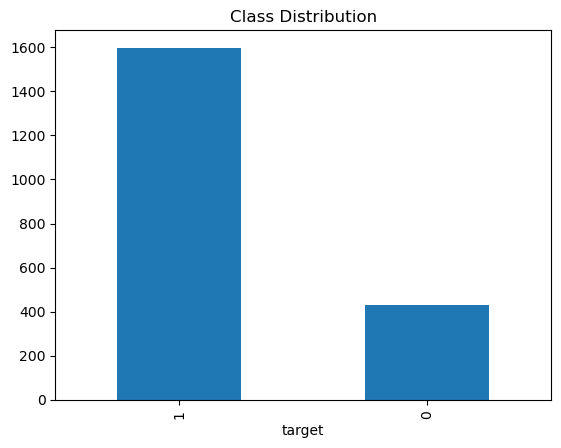

Total PNG images found: 2027
First 5 images: ['D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10013.1517875220.968509.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.1002.1517875165.878183.png']


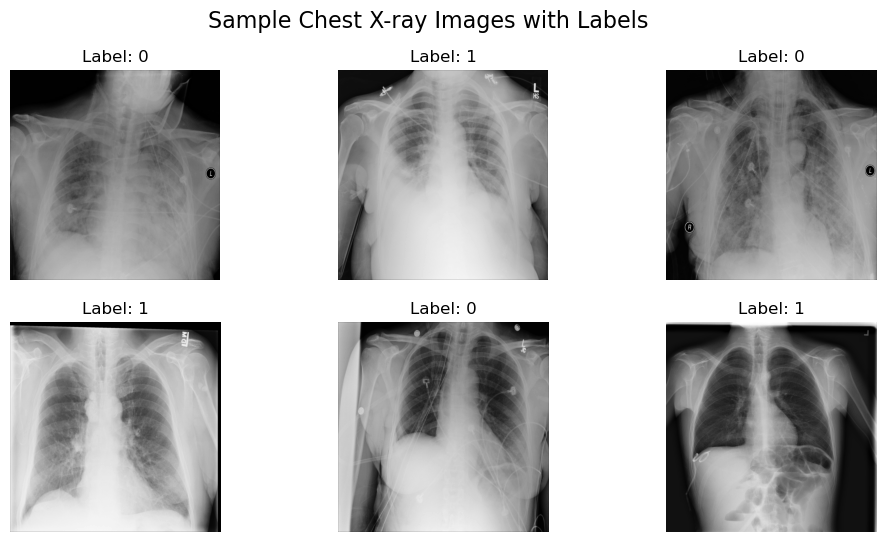

In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import glob

# -----------------------------
# 1- Set base folder path (contains images + CSV)
# -----------------------------
base_folder = r"D:\ola\archive\small_train_data_set\small_train_data_set"
csv_path = os.path.join(base_folder, "train_data.csv")

# -----------------------------
# 2- Load CSV
# -----------------------------
df = pd.read_csv(csv_path)

# -----------------------------
# 3- Quick check
# -----------------------------
print("CSV head:")
print(df.head())
print("\nClass distribution:")
print(df['target'].value_counts())

df['target'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# -----------------------------
# 4- List all PNG images (directly in base_folder)
# -----------------------------
all_images = glob.glob(os.path.join(base_folder, '*.png'))

print(f"Total PNG images found: {len(all_images)}")
print("First 5 images:", all_images[:5])

if len(all_images) == 0:
    raise ValueError("No images found! Please check your path or image extensions.")

# -----------------------------
# 5- Display 6 random images with labels
# -----------------------------
num_samples = 6
if len(all_images) < num_samples:
    num_samples = len(all_images)
    print(f"Only {num_samples} images available for display.")

sample_images = random.sample(all_images, num_samples)

plt.figure(figsize=(12,6))

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load: {img_path}")
        continue
    
    img_name = os.path.basename(img_path)
    
    # Get label from CSV
    label_row = df[df['file_name'] == img_name]
    if not label_row.empty:
        label = label_row['target'].values[0]
    else:
        label = "N/A"
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.suptitle("Sample Chest X-ray Images with Labels", fontsize=16)
plt.show()


## **Preprocessing** ##

CSV head:
   Unnamed: 0.1  Unnamed: 0  \
0          6193        6193   
1           377         377   
2          9874        9874   
3          4966        4966   
4          5330        5330   

                                           file_name  target  
0  1.2.276.0.7230010.3.1.4.8323329.491.1517875163...       1  
1  1.2.276.0.7230010.3.1.4.8323329.14299.15178752...       1  
2  1.2.276.0.7230010.3.1.4.8323329.1002.151787516...       1  
3  1.2.276.0.7230010.3.1.4.8323329.4475.151787518...       1  
4  1.2.276.0.7230010.3.1.4.8323329.3568.151787517...       1  

Class distribution:
target
1    1597
0     430
Name: count, dtype: int64


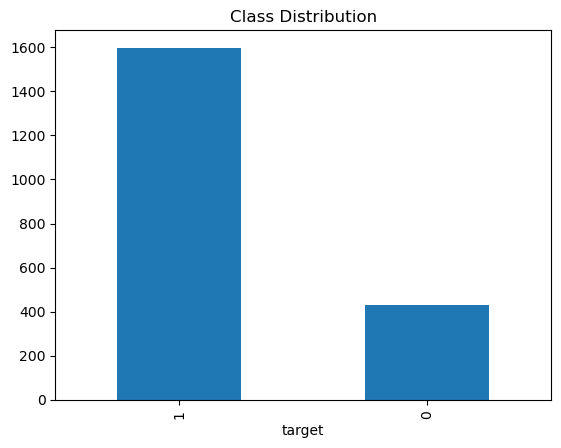

Total PNG images found: 2027
First 5 images: ['D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.10013.1517875220.968509.png', 'D:\\ola\\archive\\small_train_data_set\\small_train_data_set\\1.2.276.0.7230010.3.1.4.8323329.1002.1517875165.878183.png']
No missing images in disk.
No extra images on disk.


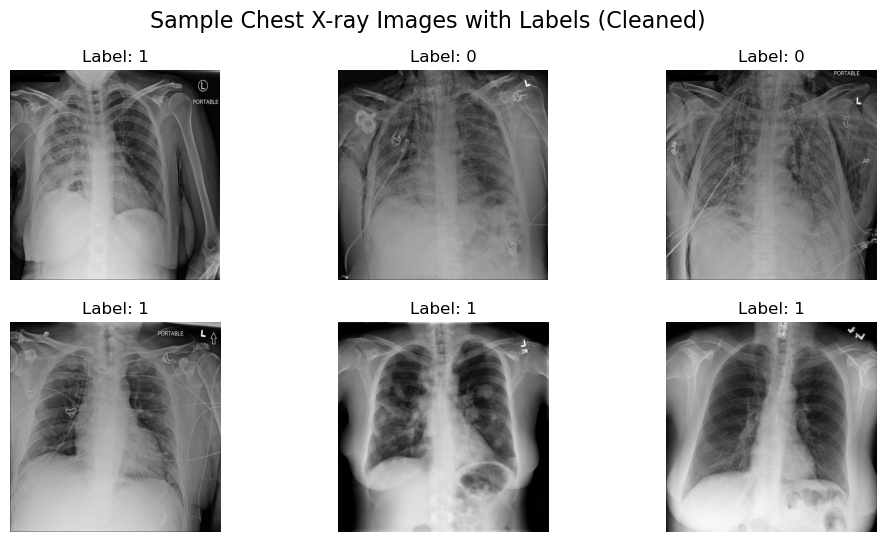

No corrupted images found.
Total images after cleaning: 2027
Total labels after cleaning: 2027


In [18]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import glob
import numpy as np

# -----------------------------
# 1- Set base folder path (contains images + CSV)
# -----------------------------
base_folder = r"D:\ola\archive\small_train_data_set\small_train_data_set"
csv_path = os.path.join(base_folder, "train_data.csv")

# -----------------------------
# 2- Load CSV
# -----------------------------
df = pd.read_csv(csv_path)

# -----------------------------
# 3- Quick check
# -----------------------------
print("CSV head:")
print(df.head())
print("\nClass distribution:")
print(df['target'].value_counts())

df['target'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# -----------------------------
# 4- List all PNG images (directly in base_folder)
# -----------------------------
all_images = glob.glob(os.path.join(base_folder, '*.png'))
print(f"Total PNG images found: {len(all_images)}")
print("First 5 images:", all_images[:5])

if len(all_images) == 0:
    raise ValueError("No images found! Please check your path or image extensions.")

# -----------------------------
# 5- Cleaning: Check for missing/extra images
# -----------------------------
# Images mentioned in CSV but missing on disk
csv_filenames = df['file_name'].tolist()
images_filenames = [os.path.basename(p) for p in all_images]

missing_in_disk = [f for f in csv_filenames if f not in images_filenames]
if missing_in_disk:
    print(f"Images in CSV but missing on disk: {len(missing_in_disk)}")
else:
    print("No missing images in disk.")

# Images on disk but not in CSV
extra_on_disk = [f for f in images_filenames if f not in csv_filenames]
if extra_on_disk:
    print(f"Images on disk but missing in CSV: {len(extra_on_disk)}")
else:
    print("No extra images on disk.")

# Keep only images that exist both in CSV and disk
all_images = [p for p in all_images if os.path.basename(p) in csv_filenames]

# -----------------------------
# 6- Display 6 random images with labels (after cleaning)
# -----------------------------
num_samples = 6
if len(all_images) < num_samples:
    num_samples = len(all_images)
    print(f"Only {num_samples} images available for display.")

sample_images = random.sample(all_images, num_samples)

plt.figure(figsize=(12,6))

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load: {img_path}")
        continue
    
    img_name = os.path.basename(img_path)
    
    # Get label from CSV
    label_row = df[df['file_name'] == img_name]
    if not label_row.empty:
        label = label_row['target'].values[0]
    else:
        label = "N/A"
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.suptitle("Sample Chest X-ray Images with Labels (Cleaned)", fontsize=16)
plt.show()

# -----------------------------
# 7- Optional: Check for corrupted images (cannot be read)
# -----------------------------
corrupted_images = []
for img_path in all_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        corrupted_images.append(img_path)

if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images. They will be removed.")
    # Remove corrupted images from list
    all_images = [p for p in all_images if p not in corrupted_images]
else:
    print("No corrupted images found.")

# -----------------------------
# 8- Prepare labels array after cleaning
# -----------------------------
y = np.array([df[df['file_name'] == os.path.basename(p)]['target'].values[0] for p in all_images])
print(f"Total images after cleaning: {len(all_images)}")
print(f"Total labels after cleaning: {len(y)}")

## **1-Resize** ##

Step 1 completed: Resize applied to all images.
Total images resized: 2027



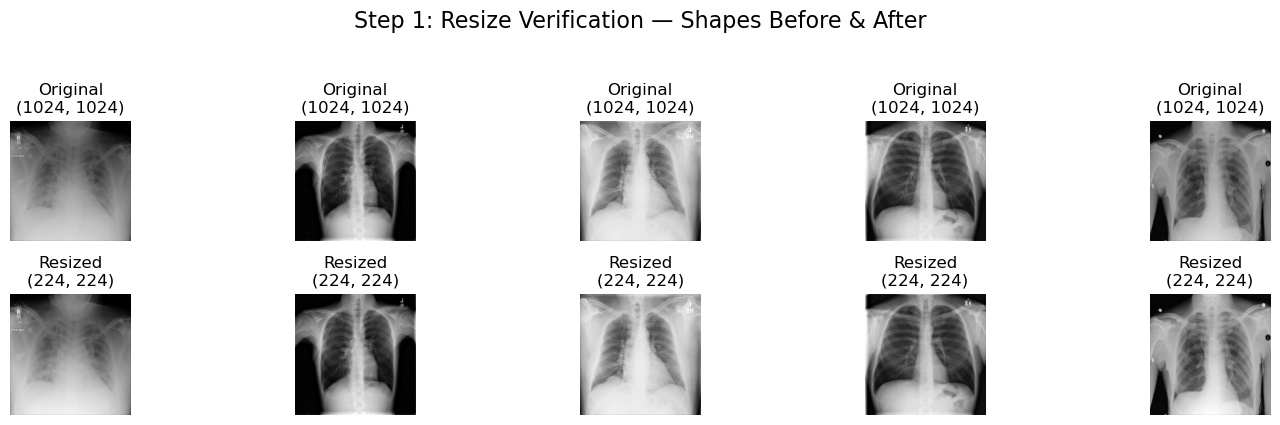

In [2]:
# ---------------------------------------
# Step 1: Resize all images to 224x224 + verification (with shapes)
# ---------------------------------------

resize_dim = (224, 224)  # Target size for Xception
resized_images = []

# Resize all images
for img_path in all_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    original_shape = img.shape  # Save original shape
    img_resized = cv2.resize(img, resize_dim, interpolation=cv2.INTER_AREA)
    resized_images.append(img_resized)

# Programmatic verification
print("Step 1 completed: Resize applied to all images.")
print(f"Total images resized: {len(resized_images)}\n")

# Visual verification - display 5 random samples with shapes
sample_indices = random.sample(range(len(resized_images)), 5)
plt.figure(figsize=(15,4))

for i, idx in enumerate(sample_indices):
    # Load original image to get shape
    img_orig = cv2.imread(all_images[idx], cv2.IMREAD_GRAYSCALE)
    
    plt.subplot(2,5,i+1)
    plt.imshow(img_orig, cmap='gray')
    plt.title(f"Original\n{img_orig.shape}")
    plt.axis('off')
    
    plt.subplot(2,5,i+6)
    plt.imshow(resized_images[idx], cmap='gray')
    plt.title(f"Resized\n{resized_images[idx].shape}")
    plt.axis('off')

plt.suptitle("Step 1: Resize Verification — Shapes Before & After", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


## **Step 2: CLAHE (Histogram Equalization)** ##

Step 2 completed: CLAHE applied to all images.
Total images processed: 2027
Example shape after CLAHE: (224, 224)



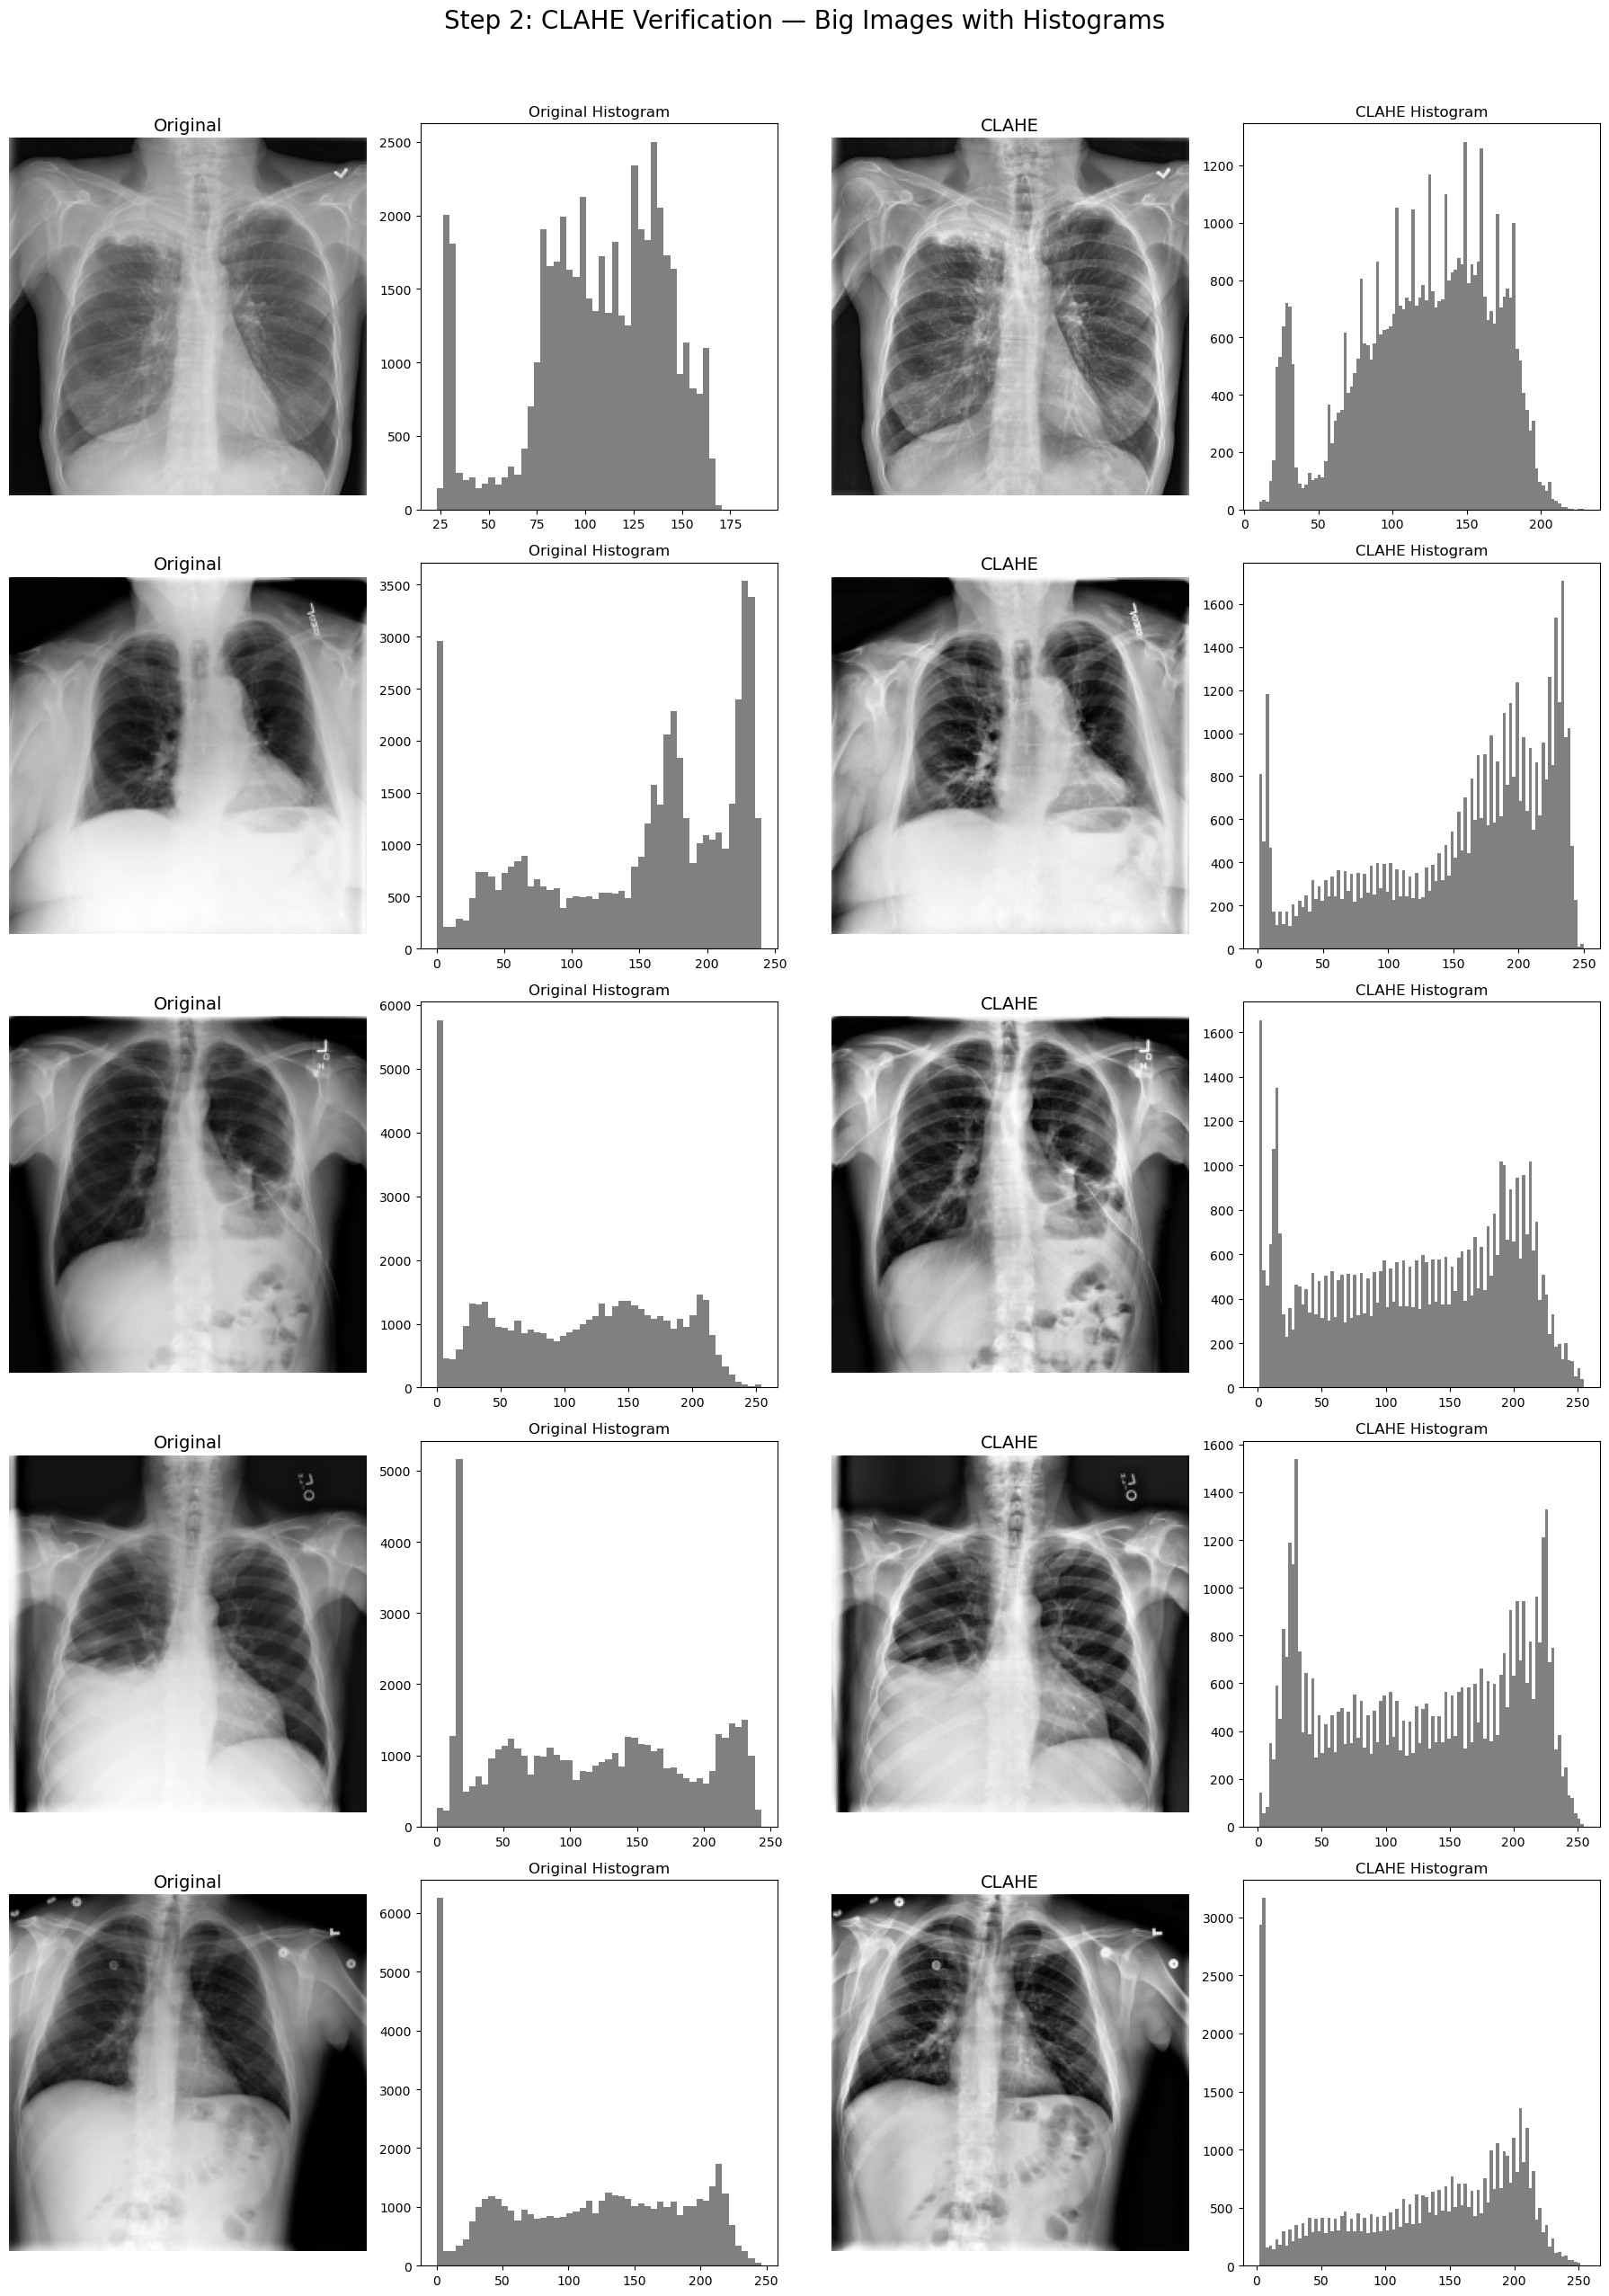

In [3]:
# ---------------------------------------
# Step 2: CLAHE (Histogram Equalization) + Visual & Programmatic Verification
# ---------------------------------------

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

clahe_images = []

# Apply CLAHE to all resized images
for img in resized_images:
    img_clahe = clahe.apply(img)
    clahe_images.append(img_clahe)

# Programmatic verification
print("Step 2 completed: CLAHE applied to all images.")
print(f"Total images processed: {len(clahe_images)}")
print(f"Example shape after CLAHE: {clahe_images[0].shape}\n")

# Visual verification - 5 random samples
sample_indices = random.sample(range(len(clahe_images)), 5)
num_samples = len(sample_indices)

plt.figure(figsize=(18, 5*num_samples))  # Height scales with number of samples

for i, idx in enumerate(sample_indices):
    img_orig = resized_images[idx]
    img_clahe = clahe_images[idx]

    # Original image
    plt.subplot(num_samples, 4, 4*i + 1)
    plt.imshow(img_orig, cmap='gray')
    plt.title("Original", fontsize=14)
    plt.axis('off')

    # Histogram original
    plt.subplot(num_samples, 4, 4*i + 2)
    plt.hist(img_orig.flatten(), bins=50, color='gray')  # more bins for detail
    plt.title("Original Histogram", fontsize=12)

    # CLAHE image
    plt.subplot(num_samples, 4, 4*i + 3)
    plt.imshow(img_clahe, cmap='gray')
    plt.title("CLAHE", fontsize=14)
    plt.axis('off')

    # Histogram CLAHE
    plt.subplot(num_samples, 4, 4*i + 4)
    plt.hist(img_clahe.flatten(), bins=100, color='gray')
    plt.title("CLAHE Histogram", fontsize=12)

plt.suptitle("Step 2: CLAHE Verification — Big Images with Histograms", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


## **Step 3: Normalization [-1,1]** ##

Step 3 completed: Normalization [-1,1] applied to all images.
Total images normalized: 2027



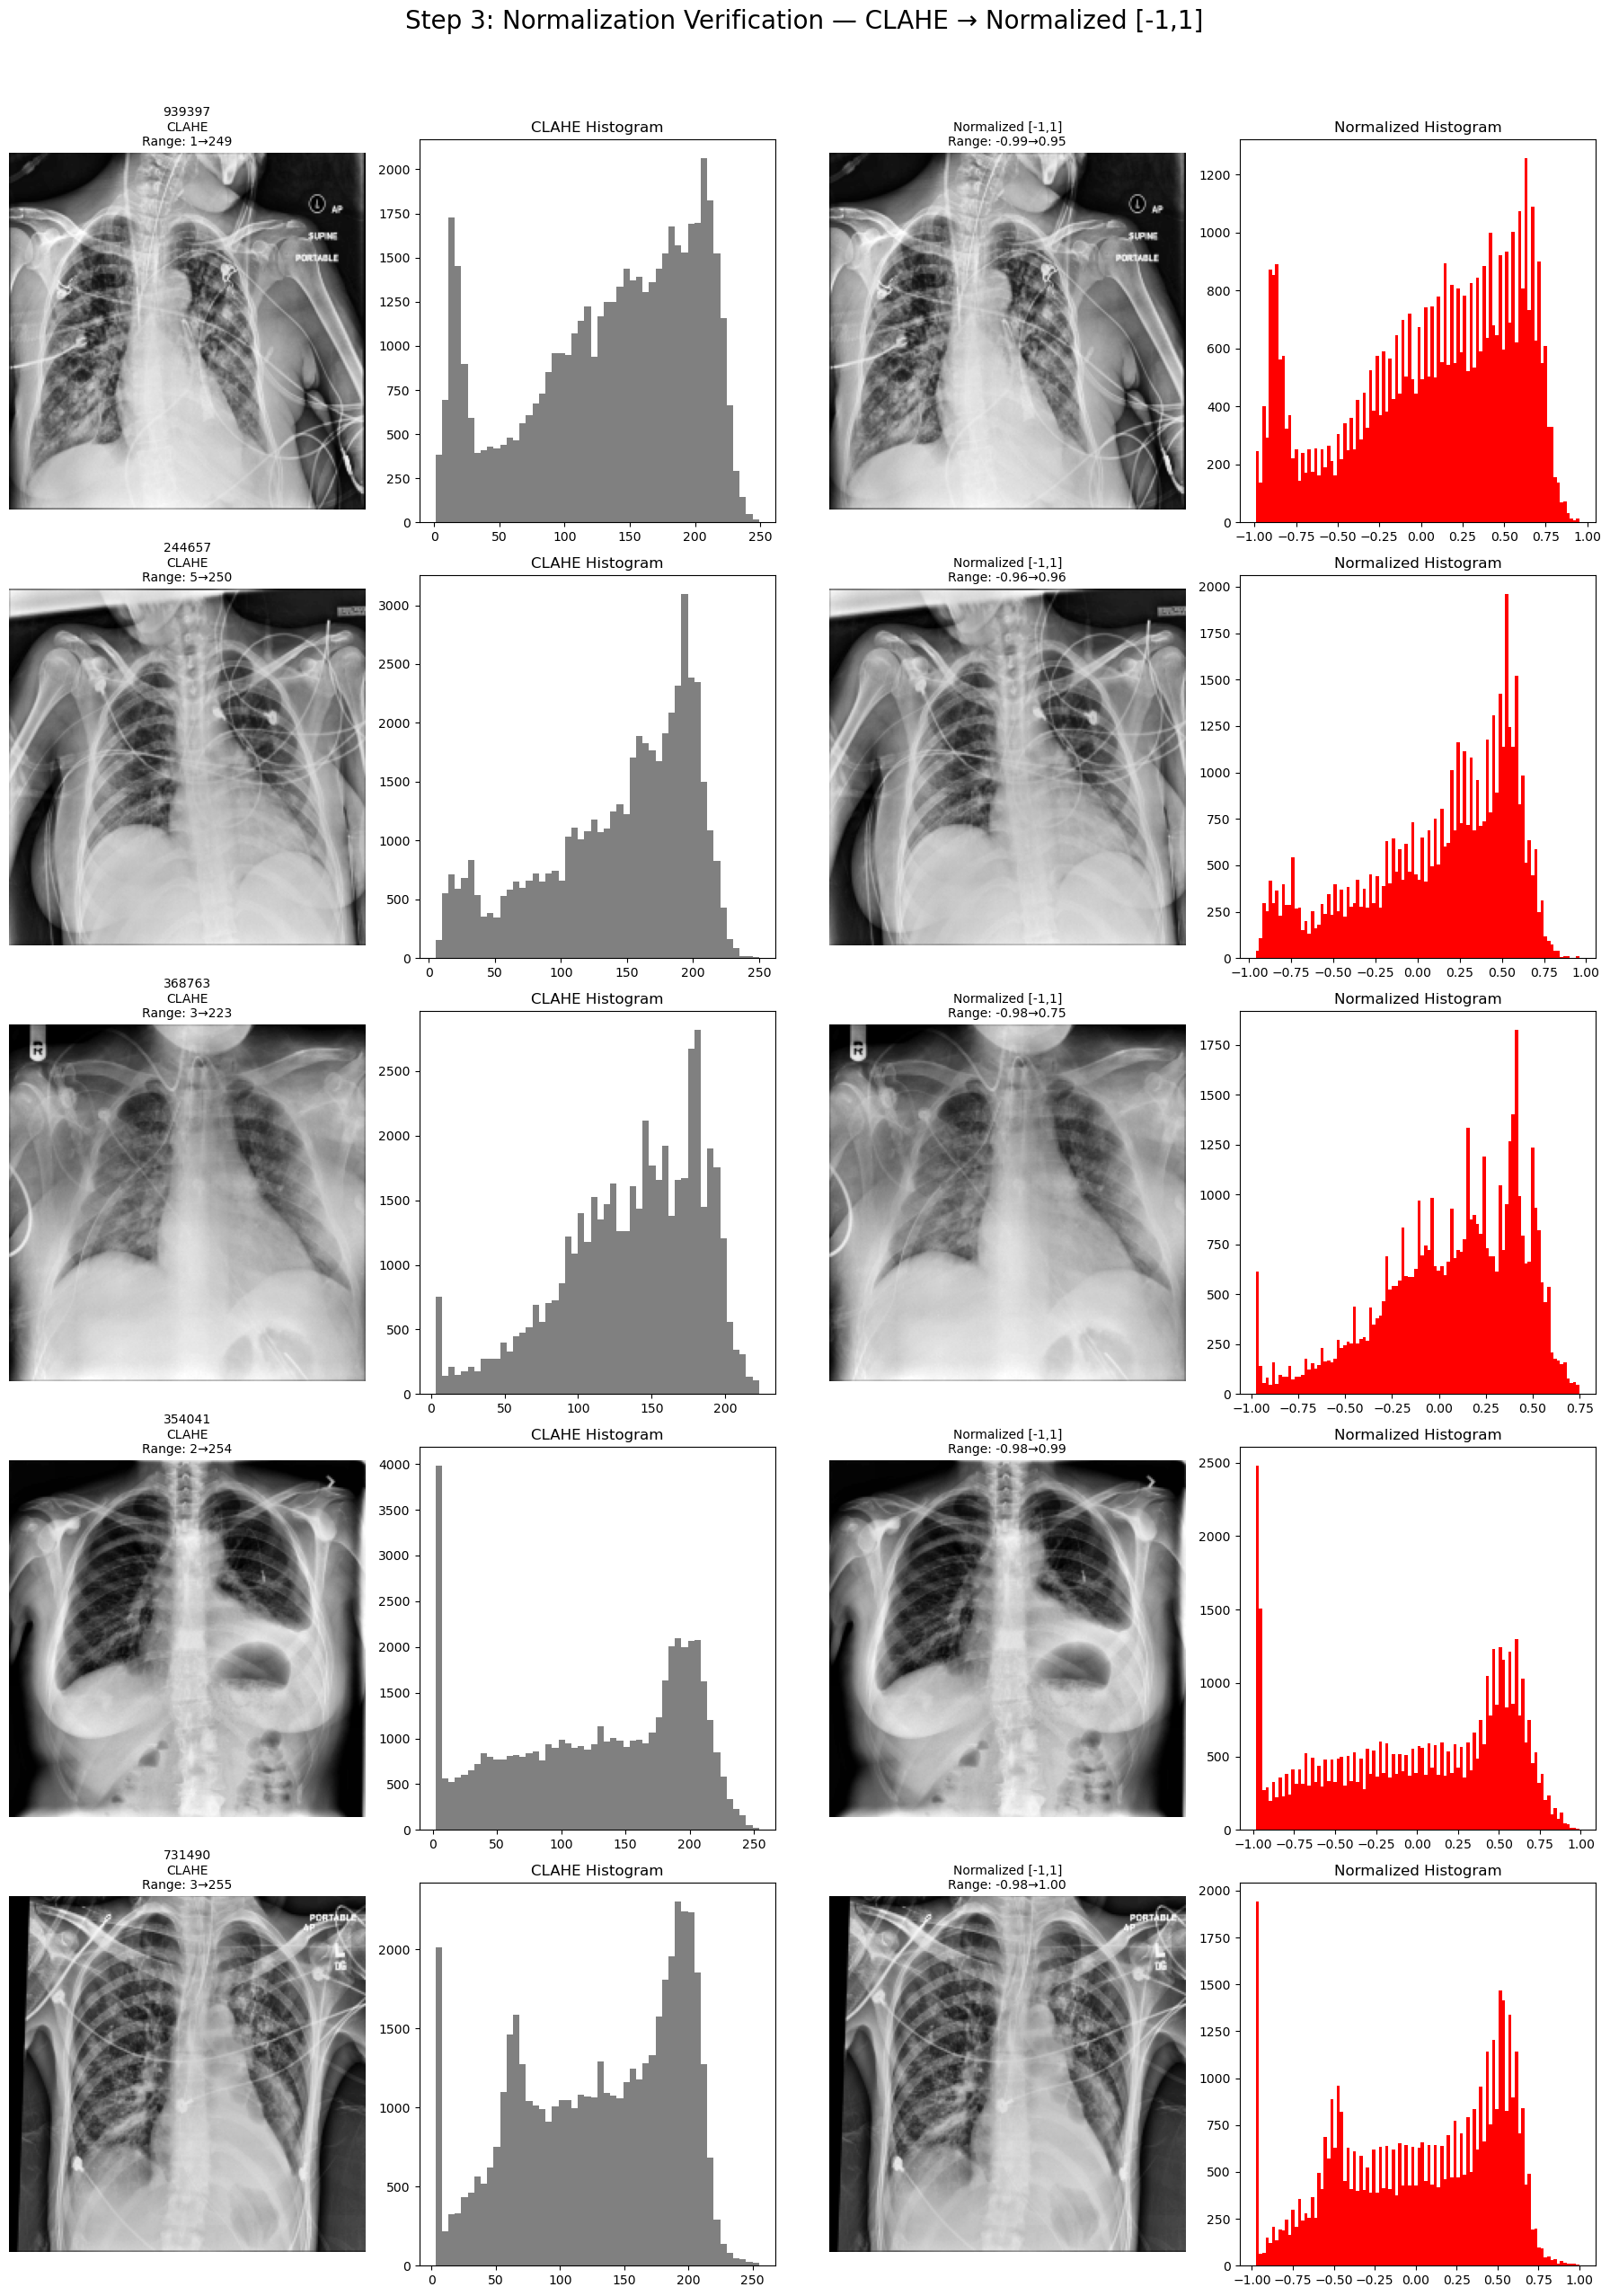

In [4]:
# ---------------------------------------
# Step 3: Normalization [-1,1] applied to all images + Visual & Programmatic Verification
# ---------------------------------------

def normalize_neg1_1(img):
    """Normalize image to [-1,1] range for Xception"""
    return img.astype("float32") / 127.5 - 1.0

# Apply normalization to all CLAHE images
normalized_images = [normalize_neg1_1(img) for img in clahe_images]

# Programmatic verification
print("Step 3 completed: Normalization [-1,1] applied to all images.")
print(f"Total images normalized: {len(normalized_images)}\n")

# Visual verification - 5 random samples
sample_indices = random.sample(range(len(normalized_images)), 5)
num_samples = len(sample_indices)

plt.figure(figsize=(18, 5*num_samples))

for i, idx in enumerate(sample_indices):
    img_clahe = clahe_images[idx]
    img_norm = normalized_images[idx]
    img_name_full = os.path.basename(all_images[idx])
    
    # Shorten name: take only last 8 characters before .png
    img_name_short = img_name_full.split('.')[-2][-8:]

    # Compute ranges
    orig_min, orig_max = img_clahe.min(), img_clahe.max()
    norm_min, norm_max = img_norm.min(), img_norm.max()
    
    # Plot CLAHE image (before normalization)
    plt.subplot(num_samples, 4, 4*i + 1)
    plt.imshow(img_clahe, cmap='gray')
    plt.title(f"{img_name_short}\nCLAHE\nRange: {orig_min}→{orig_max}", fontsize=10)
    plt.axis('off')

    # Histogram CLAHE
    plt.subplot(num_samples, 4, 4*i + 2)
    plt.hist(img_clahe.flatten(), bins=50, color='gray')
    plt.title("CLAHE Histogram", fontsize=12)

    # Plot normalized image
    plt.subplot(num_samples, 4, 4*i + 3)
    plt.imshow(img_norm, cmap='gray')
    plt.title(f"Normalized [-1,1]\nRange: {norm_min:.2f}→{norm_max:.2f}", fontsize=10)
    plt.axis('off')

    # Histogram normalized
    plt.subplot(num_samples, 4, 4*i + 4)
    plt.hist(img_norm.flatten(), bins=100, color='red')
    plt.title("Normalized Histogram", fontsize=12)

plt.suptitle("Step 3: Normalization Verification — CLAHE → Normalized [-1,1]", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


## **Data Splitting** ##

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert normalized_images and labels to arrays
X = np.array(normalized_images)
y = np.array([df[df['file_name']==os.path.basename(p)]['target'].values[0] 
              for p in all_images])

# First split: Train + Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Validation + Test (50/50 of Temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print dataset sizes
print("Dataset split completed:")
print(f"Train: {X_train.shape[0]} images")
print(f"Validation: {X_val.shape[0]} images")
print(f"Test: {X_test.shape[0]} images")


Dataset split completed:
Train: 1418 images
Validation: 304 images
Test: 305 images


## **DenseNet121 Model Training & Evaluation** ##

After adding channel dimension:
(1418, 224, 224, 1) (304, 224, 224, 1) (305, 224, 224, 1)
Balanced class distribution (Train only): {0: 1117, 1: 1117}
Total images after balancing: 2234
After converting to 3 channels:
(2234, 224, 224, 3) (304, 224, 224, 3) (305, 224, 224, 3)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_6              │ (None, 230, 230, 3)       │               0 │ input_layer_3[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_6[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_7              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_7[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,300,161 (27.85 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 139s 882ms/step - accuracy: 0.6553 - auc: 0.7173 - loss: 0.6439 - recall: 0.6652 - val_accuracy: 0.7500 - val_auc: 0.7070 - val_loss: 0.5108 - val_recall: 0.8625 - learning_rate: 1.0000e-04
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 949ms/step - accuracy: 0.7807 - auc: 0.8631 - loss: 0.4598 - recall: 0.7923 - val_accuracy: 0.7566 - val_auc: 0.7246 - val_loss: 0.4939 - val_recall: 0.8583 - learning_rate: 1.0000e-04
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8093 - auc: 0.8940 - loss: 0.4071 - recall: 0.8236 - val_accuracy: 0.7697 - val_auc: 0.7337 - val_loss: 0.4807 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 121s 867ms/step - accuracy: 0.8330 - auc: 0.9136 - loss: 0.3716 - recall: 0.8550 - val_accuracy: 0.7829 - val_auc: 0.7502 - val_loss: 0.4863 - val_recall: 0.8667 - learning_rate: 1.0000e-04
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 119s 853ms/step - accuracy: 0.8339 - auc: 0

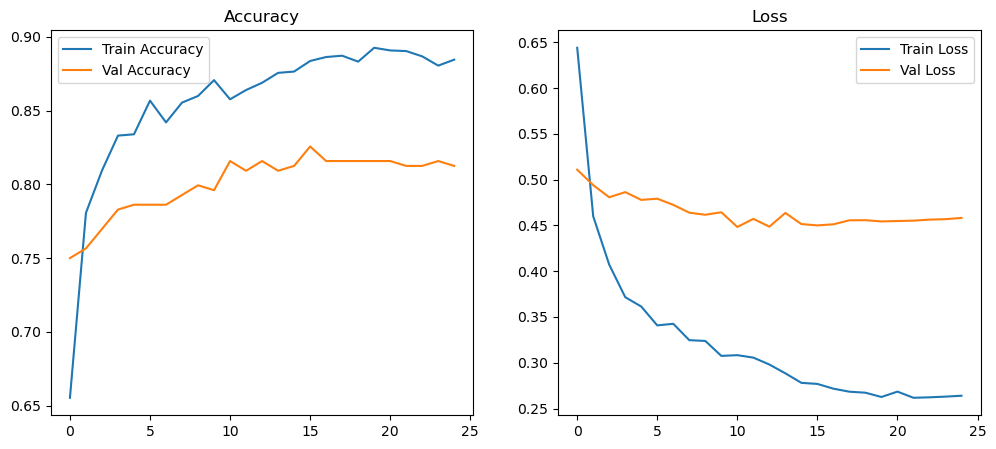

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
Validation Confusion Matrix:
[[ 32  32]
 [ 24 216]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        64
           1       0.87      0.90      0.89       240

    accuracy                           0.82       304
   macro avg       0.72      0.70      0.71       304
weighted avg       0.81      0.82      0.81       304

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Test Confusion Matrix:
[[ 24  41]
 [ 23 217]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.37      0.43        65
           1       0.84      0.90      0.87       240

    accuracy                           0.79       305
   macro avg       0.68      0.64      0.65       305
weighted avg       0.77      0.79      0.78       305



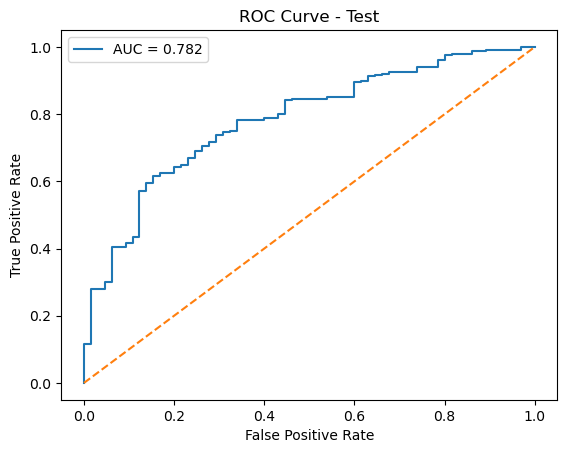

In [22]:
# ======================================================
# START FROM HERE – AFTER DATA SPLITTING + AUGMENTATION
# Assumes you already have: X_train, X_val, X_test, y_train, y_val, y_test
# ======================================================

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ------------------------------
# 1. Fix random seeds
# ------------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------------------------------
# 2. Ensure channel dimension exists
# ------------------------------
if X_train.ndim == 3:  # (num_samples, H, W)
    X_train = np.expand_dims(X_train, axis=-1)
    X_val   = np.expand_dims(X_val, axis=-1)
    X_test  = np.expand_dims(X_test, axis=-1)

print("After adding channel dimension:")
print(X_train.shape, X_val.shape, X_test.shape)

# ------------------------------
# 3. Balanced Oversampling + Augmentation on Train only
# ------------------------------
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

X_train_balanced = list(X_train)
y_train_balanced = list(y_train)

unique_classes, counts = np.unique(y_train, return_counts=True)
max_count = counts.max()

for cls, count in zip(unique_classes, counts):
    if count < max_count:
        X_cls = X_train[y_train == cls]
        n_to_generate = max_count - count
        for _ in range(n_to_generate):
            idx = np.random.randint(0, X_cls.shape[0])
            img = X_cls[idx]
            img_aug = train_datagen.random_transform(img)
            X_train_balanced.append(img_aug)
            y_train_balanced.append(cls)

X_train_balanced = np.array(X_train_balanced)
y_train_balanced = np.array(y_train_balanced)

# Verify new class distribution
unique_classes_bal, counts_bal = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced class distribution (Train only): {dict(zip(unique_classes_bal, counts_bal))}")
print(f"Total images after balancing: {X_train_balanced.shape[0]}")

# ------------------------------
# 4. Convert grayscale → RGB (3 channels)
# ------------------------------
def gray_to_rgb(X_gray):
    return np.concatenate([X_gray, X_gray, X_gray], axis=-1)

X_train_rgb = gray_to_rgb(X_train_balanced)
X_val_rgb   = gray_to_rgb(X_val)
X_test_rgb  = gray_to_rgb(X_test)

print("After converting to 3 channels:")
print(X_train_rgb.shape, X_val_rgb.shape, X_test_rgb.shape)

# ------------------------------
# 5. Handle class imbalance (optional now)
# ------------------------------
# Since train is balanced via oversampling, class_weight can be None
class_weights = None

# ------------------------------
# 6. Build DenseNet121 model
# ------------------------------
input_tensor = Input(shape=(224, 224, 3))

base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_tensor=input_tensor
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)

# ------------------------------
# 7. Compile model
# ------------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

model.summary()

# ------------------------------
# 8. Callbacks
# ------------------------------
callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=5,
        mode='max',
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-6
    )
]

# ------------------------------
# 9. Train the model
# ------------------------------
history = model.fit(
    X_train_rgb, y_train_balanced,
    validation_data=(X_val_rgb, y_val),
    epochs=30,
    batch_size=16,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ------------------------------
# 10. Plot training curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# ------------------------------
# 11. Validation evaluation
# ------------------------------
y_val_pred = model.predict(X_val_rgb).ravel()
y_val_bin = (y_val_pred > 0.5).astype(int)

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_bin))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_bin))

# ------------------------------
# 12. Test evaluation
# ------------------------------
y_test_pred = model.predict(X_test_rgb).ravel()
y_test_bin = (y_test_pred > 0.5).astype(int)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_bin))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_bin))

# ------------------------------
# 13. ROC Curve (Test set)
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend()
plt.show()


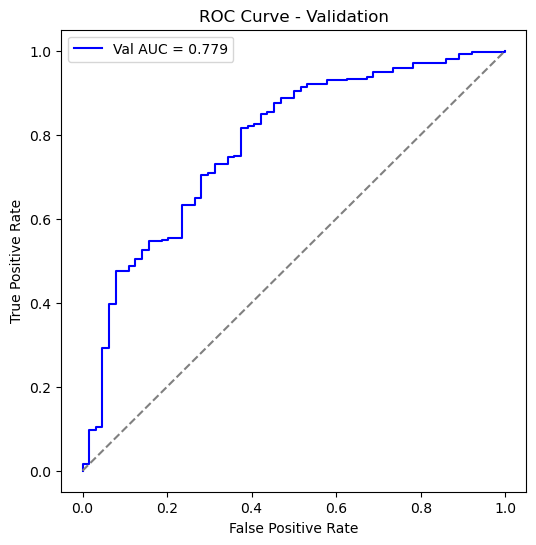

In [24]:
# ------------------------------
# ROC Curve - Validation set
# ------------------------------
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(6,6))
plt.plot(fpr_val, tpr_val, label=f"Val AUC = {roc_auc_val:.3f}", color='blue')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation')
plt.legend()
plt.show()


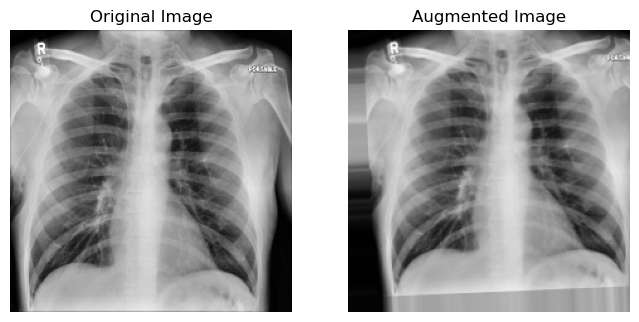

In [29]:
import matplotlib.pyplot as plt

# Pick one sample image
idx = np.random.randint(0, X_train.shape[0])
original = X_train[idx]

# Apply augmentation
augmented = train_datagen.random_transform(original)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(original.squeeze(), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(augmented.squeeze(), cmap='gray')
plt.title("Augmented Image")
plt.axis('off')
plt.show() 


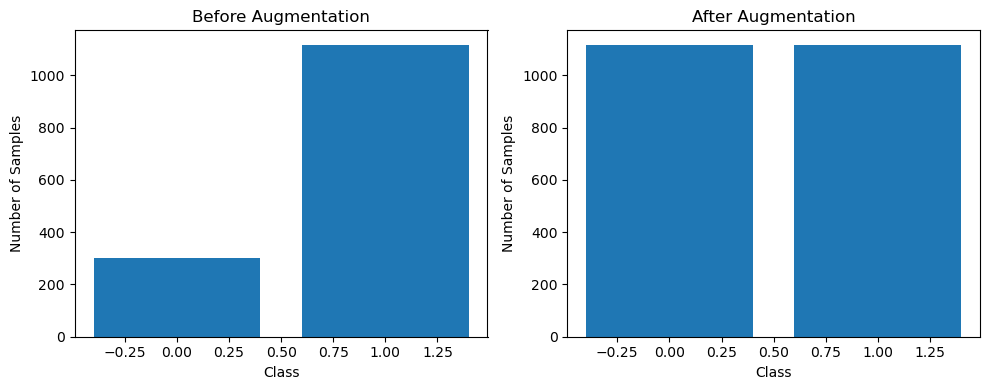

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Before augmentation
classes_before, counts_before = np.unique(y_train, return_counts=True)

# After augmentation (balanced train set)
classes_after, counts_after = np.unique(y_train_balanced, return_counts=True)

plt.figure(figsize=(10,4))

# Before Augmentation
plt.subplot(1,2,1)
plt.bar(classes_before, counts_before)
plt.title("Before Augmentation")
plt.xlabel("Class")
plt.ylabel("Number of Samples")

# After Augmentation
plt.subplot(1,2,2)
plt.bar(classes_after, counts_after)
plt.title("After Augmentation")
plt.xlabel("Class")
plt.ylabel("Number of Samples")

plt.tight_layout()
plt.show()



After adding channel dimension:
(1418, 224, 224, 1) (304, 224, 224, 1) (305, 224, 224, 1)
Balanced class distribution (Train only): {0: 1117, 1: 1117}
Total images after balancing: 2234
After converting to 3 channels:
(2234, 224, 224, 3) (304, 224, 224, 3) (305, 224, 224, 3)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 72s 1us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 117s 790ms/step - accuracy: 0.5103 - auc: 0.5250 - loss: 0.7462 - recall: 0.5210 - val_accuracy: 0.5230 - val_auc: 0.6048 - val_loss: 0.6963 - val_recall: 0.4708 - learning_rate: 1.0000e-04
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 107s 762ms/step - accuracy: 0.5564 - auc: 0.5663 - loss: 0.7016 - recall: 0.5577 - val_accuracy: 0.5066 - val_auc: 0.6150 - val_loss: 0.7123 - val_recall: 0.4333 - learning_rate: 1.0000e-04
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 116s 829ms/step - accuracy: 0.5833 - auc: 0.6058 - loss: 0.6769 - recall: 0.5873 - val_accuracy: 0.5691 - val_auc: 0.6150 - val_loss: 0.7018 - val_recall: 0.5167 - learning_rate: 1.0000e-04
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 120s 855ms/step - accuracy: 0.5936 - auc: 0.6283 - loss: 0.6663 - recall: 0.5855 - val_accuracy: 0.6250 - val_auc: 0.6130 - val_loss: 0.6735 - val_recall: 0.6375 - learning_rate: 1.0000e-04
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 111s 794ms/step - accuracy: 0.6115 - auc

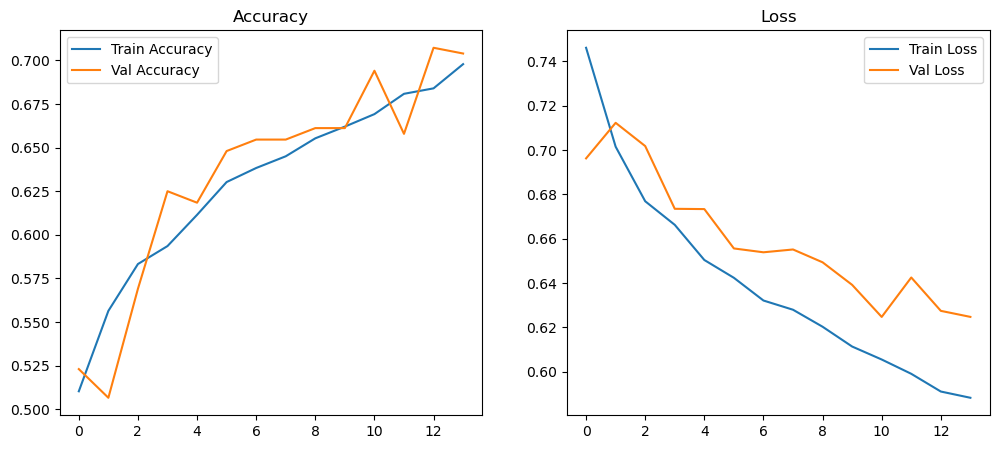

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Validation Confusion Matrix:
[[ 34  30]
 [ 73 167]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.53      0.40        64
           1       0.85      0.70      0.76       240

    accuracy                           0.66       304
   macro avg       0.58      0.61      0.58       304
weighted avg       0.74      0.66      0.69       304

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Test Confusion Matrix:
[[ 23  42]
 [ 64 176]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.35      0.30        65
           1       0.81      0.73      0.77       240

    accuracy                           0.65       305
   macro avg       0.54      0.54      0.54       305
weighted avg       0.69      0.65      0.67       305



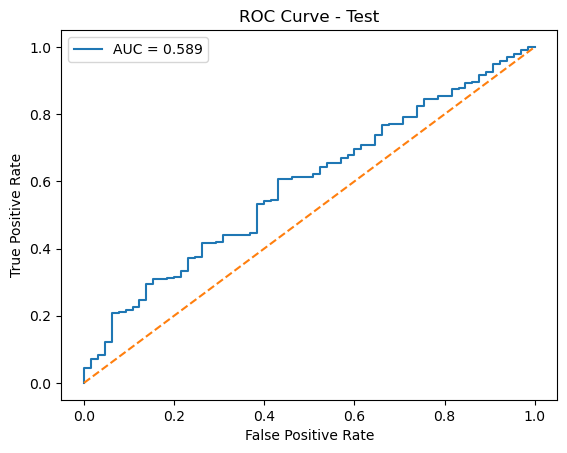

In [25]:
# ======================================================
# START FROM HERE – AFTER DATA SPLITTING + AUGMENTATION
# Assumes you already have: X_train, X_val, X_test, y_train, y_val, y_test
# ======================================================

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50


# ------------------------------
# 1. Fix random seeds
# ------------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------------------------------
# 2. Ensure channel dimension exists
# ------------------------------
if X_train.ndim == 3:  # (num_samples, H, W)
    X_train = np.expand_dims(X_train, axis=-1)
    X_val   = np.expand_dims(X_val, axis=-1)
    X_test  = np.expand_dims(X_test, axis=-1)

print("After adding channel dimension:")
print(X_train.shape, X_val.shape, X_test.shape)

# ------------------------------
# 3. Balanced Oversampling + Augmentation on Train only
# ------------------------------
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

X_train_balanced = list(X_train)
y_train_balanced = list(y_train)

unique_classes, counts = np.unique(y_train, return_counts=True)
max_count = counts.max()

for cls, count in zip(unique_classes, counts):
    if count < max_count:
        X_cls = X_train[y_train == cls]
        n_to_generate = max_count - count
        for _ in range(n_to_generate):
            idx = np.random.randint(0, X_cls.shape[0])
            img = X_cls[idx]
            img_aug = train_datagen.random_transform(img)
            X_train_balanced.append(img_aug)
            y_train_balanced.append(cls)

X_train_balanced = np.array(X_train_balanced)
y_train_balanced = np.array(y_train_balanced)

# Verify new class distribution
unique_classes_bal, counts_bal = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced class distribution (Train only): {dict(zip(unique_classes_bal, counts_bal))}")
print(f"Total images after balancing: {X_train_balanced.shape[0]}")

# ------------------------------
# 4. Convert grayscale → RGB (3 channels)
# ------------------------------
def gray_to_rgb(X_gray):
    return np.concatenate([X_gray, X_gray, X_gray], axis=-1)

X_train_rgb = gray_to_rgb(X_train_balanced)
X_val_rgb   = gray_to_rgb(X_val)
X_test_rgb  = gray_to_rgb(X_test)

print("After converting to 3 channels:")
print(X_train_rgb.shape, X_val_rgb.shape, X_test_rgb.shape)

# ------------------------------
# 5. Handle class imbalance (optional now)
# ------------------------------
# Since train is balanced via oversampling, class_weight can be None
class_weights = None

# ------------------------------
# ------------------------------
# 6. Build ResNet50 model
# ------------------------------
input_tensor = Input(shape=(224, 224, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_tensor
)

# Freeze backbone
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)

# ------------------------------
# 7. Compile model
# ------------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

model.summary()

# ------------------------------
# 8. Callbacks
# ------------------------------
callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=5,
        mode='max',
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-6
    )
]

# ------------------------------
# 9. Train the model
# ------------------------------
history = model.fit(
    X_train_rgb, y_train_balanced,
    validation_data=(X_val_rgb, y_val),
    epochs=30,
    batch_size=16,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ------------------------------
# 10. Plot training curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# ------------------------------
# 11. Validation evaluation
# ------------------------------
y_val_pred = model.predict(X_val_rgb).ravel()
y_val_bin = (y_val_pred > 0.5).astype(int)

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_bin))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_bin))

# ------------------------------
# 12. Test evaluation
# ------------------------------
y_test_pred = model.predict(X_test_rgb).ravel()
y_test_bin = (y_test_pred > 0.5).astype(int)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_bin))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_bin))

# ------------------------------
# 13. ROC Curve (Test set)
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend()
plt.show()


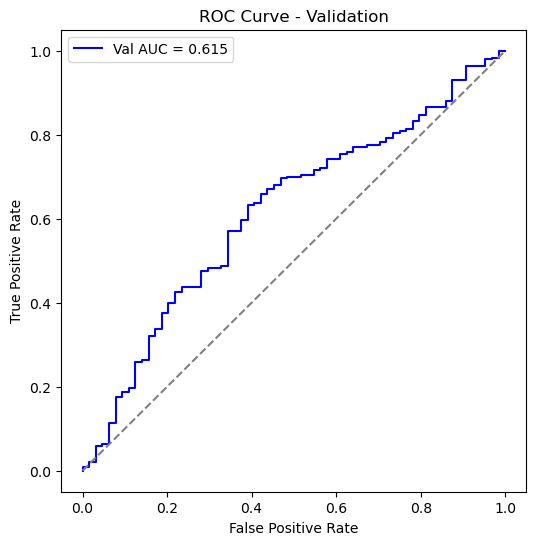

In [26]:
# ------------------------------
# ROC Curve - Validation set
# ------------------------------
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(6,6))
plt.plot(fpr_val, tpr_val, label=f"Val AUC = {roc_auc_val:.3f}", color='blue')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation')
plt.legend()
plt.show()